# Loan Prediction Model

In [2]:
#importing necessary libraries
import pandas as pd
import numpy

In [3]:
df = pd.read_csv("C:\\Users\\deep\\Downloads\\Loan_Data.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Dealing with NA valus**

In [6]:
nulllvalues=df.isnull().sum()
print(nulllvalues)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [7]:
df = df[df['Credit_History'].notnull()]

# EDA Univariate and Bivariate Analysis

Gender
Male      451
Female    101
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

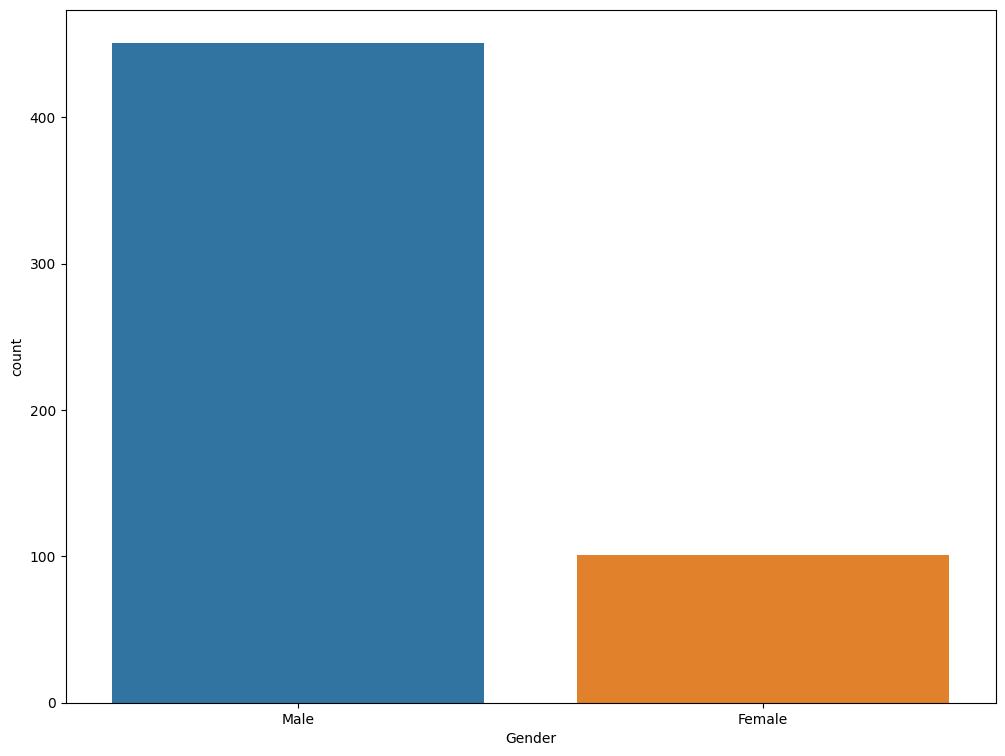

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,9))
print(df.Gender.value_counts())
sns.countplot(x=df["Gender"])

Dependents
0     316
2      95
1      90
3+     48
Name: count, dtype: int64


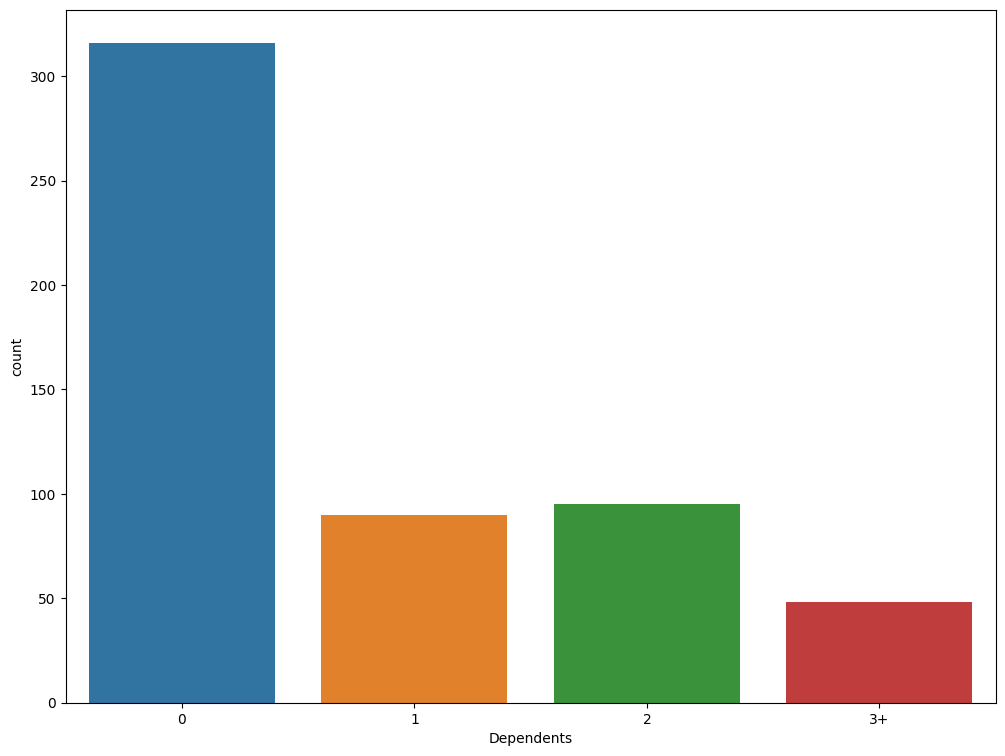

In [9]:
plt.figure(figsize=(12,9))
print(df.Dependents.value_counts())
sns.countplot(x=df['Dependents']);

Married
Yes    362
No     199
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

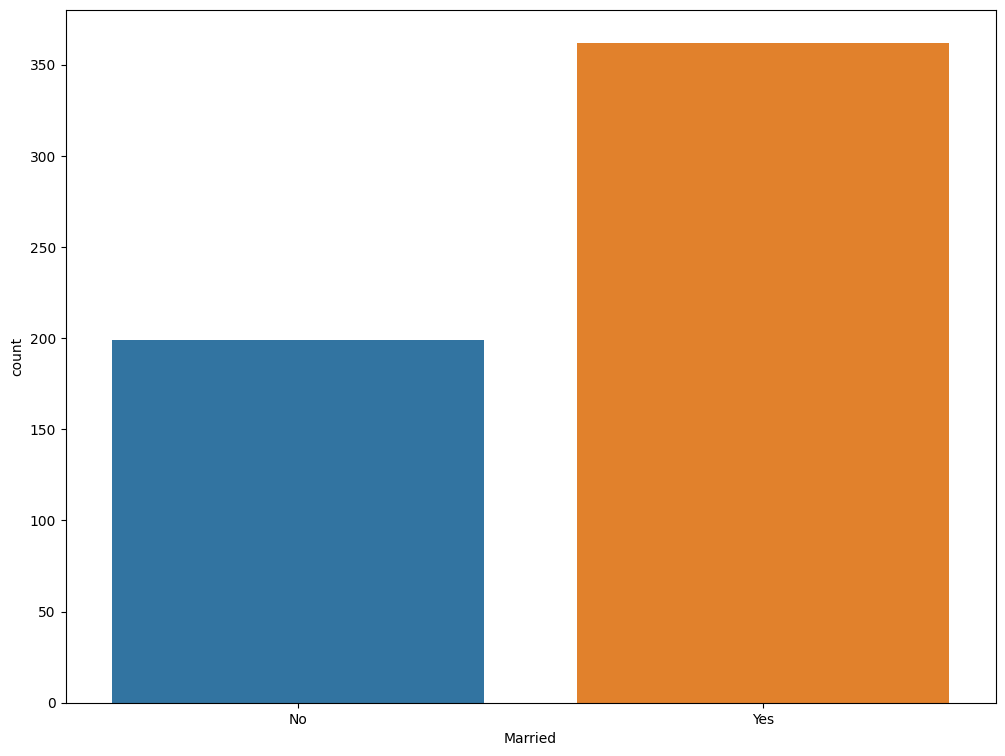

In [10]:
plt.figure(figsize=(12,9))
print(df.Married.value_counts())
sns.countplot(x=df["Married"])

Self_Employed
No     463
Yes     75
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

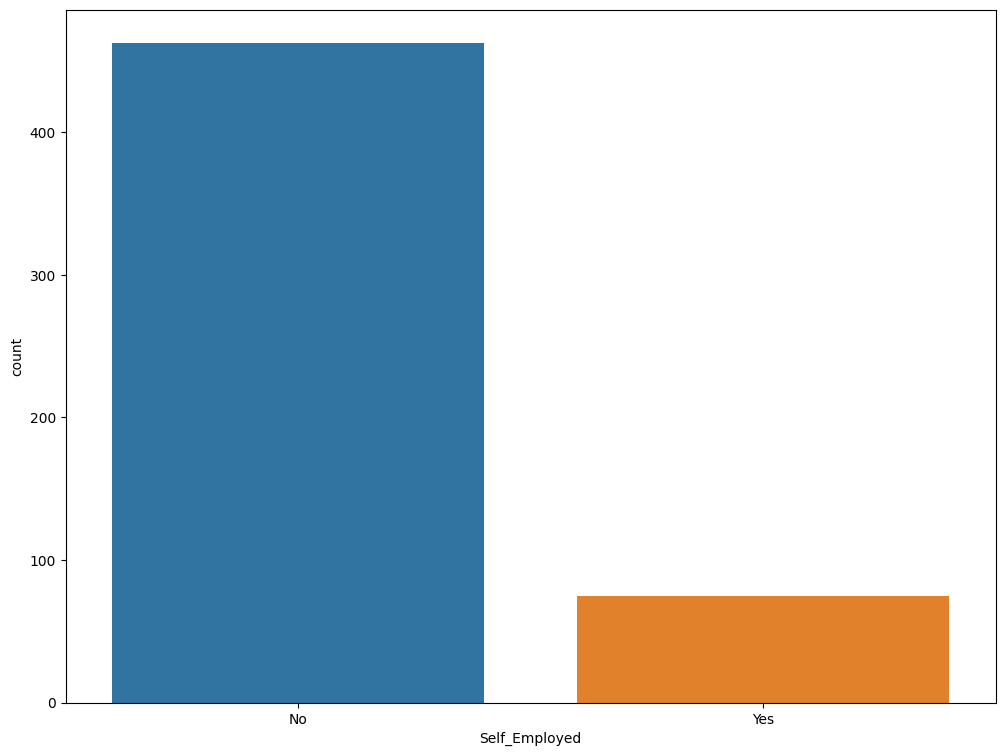

In [11]:
plt.figure(figsize=(12,9))
print(df.Self_Employed.value_counts())
sns.countplot(x=df["Self_Employed"])

In [12]:
df.groupby(['Loan_Status','Gender'])['Gender'].count()

Loan_Status  Gender
N            Female     36
             Male      138
Y            Female     65
             Male      313
Name: Gender, dtype: int64

**Now lets analyze is the histogram normal distribution or skewed**

<Axes: xlabel='LoanAmount', ylabel='Count'>

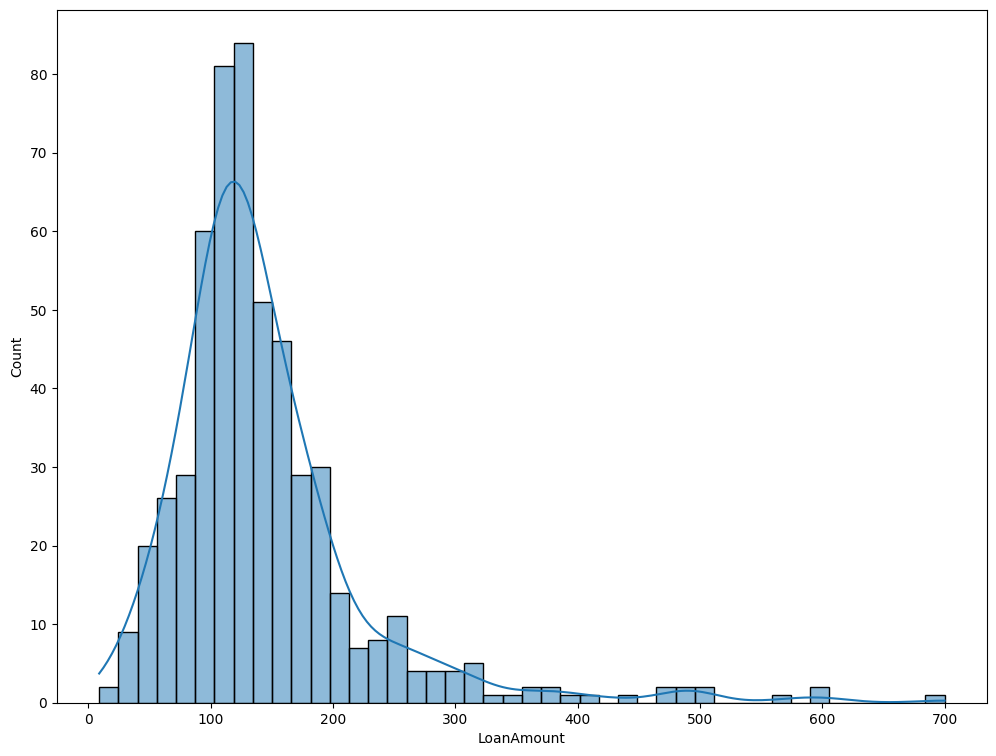

In [13]:
plt.figure(figsize=(12,9))
sns.histplot(data=df, x="LoanAmount", kde=True)


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

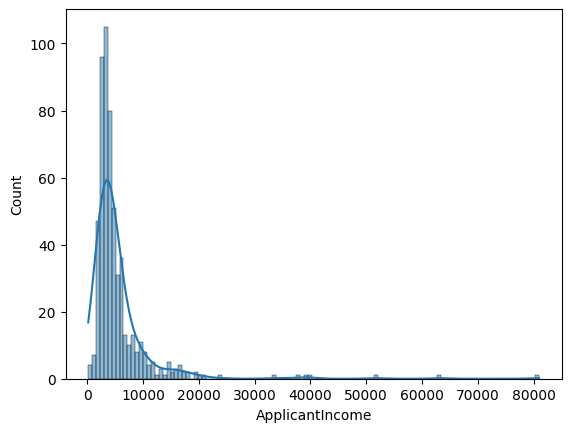

In [14]:
sns.histplot(data=df, x="ApplicantIncome", kde=True)


<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

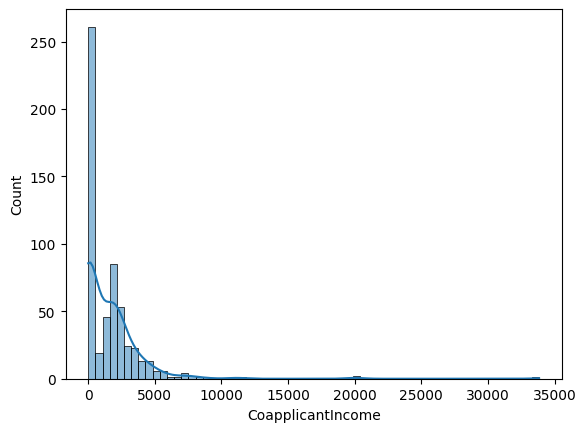

In [15]:
sns.histplot(data=df, x="CoapplicantIncome", kde=True)


<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

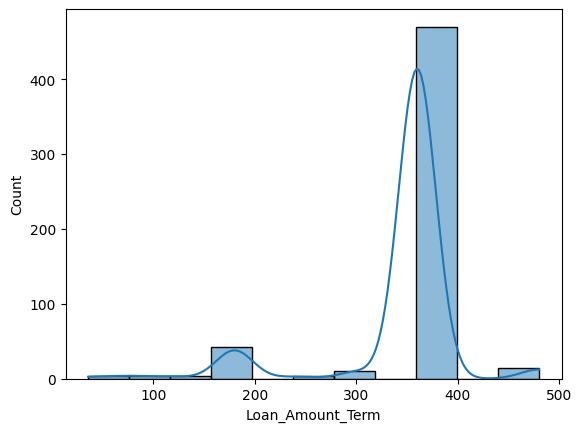

In [16]:
sns.histplot(data=df, x="Loan_Amount_Term", kde=True)

**If the histogram of an attribute is in normal distribution, then we replace the NA value with their mean value but for either right skew or left skew we replace NA value with their mode** 

In [17]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [18]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [19]:
(df.isnull().sum()/len(df))

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [20]:
df.groupby(['Loan_Amount_Term','Gender'])['Gender'].count()

Loan_Amount_Term  Gender
36.000000         Female      1
                  Male        1
60.000000         Male        2
84.000000         Female      1
                  Male        2
120.000000        Male        3
180.000000        Female      2
                  Male       41
240.000000        Female      1
                  Male        2
300.000000        Female      1
                  Male        9
342.152727        Female      3
                  Male       11
360.000000        Female     88
                  Male      382
480.000000        Female      4
                  Male       10
Name: Gender, dtype: int64

In [21]:
df.groupby(['Property_Area','Gender'])['Gender'].count()

Property_Area  Gender
Rural          Female     21
               Male      144
Semiurban      Female     51
               Male      166
Urban          Female     29
               Male      153
Name: Gender, dtype: int64

### **Correlation Analysis**
#### Here, we try to find out if there is any kind of relation exist in between attributes


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


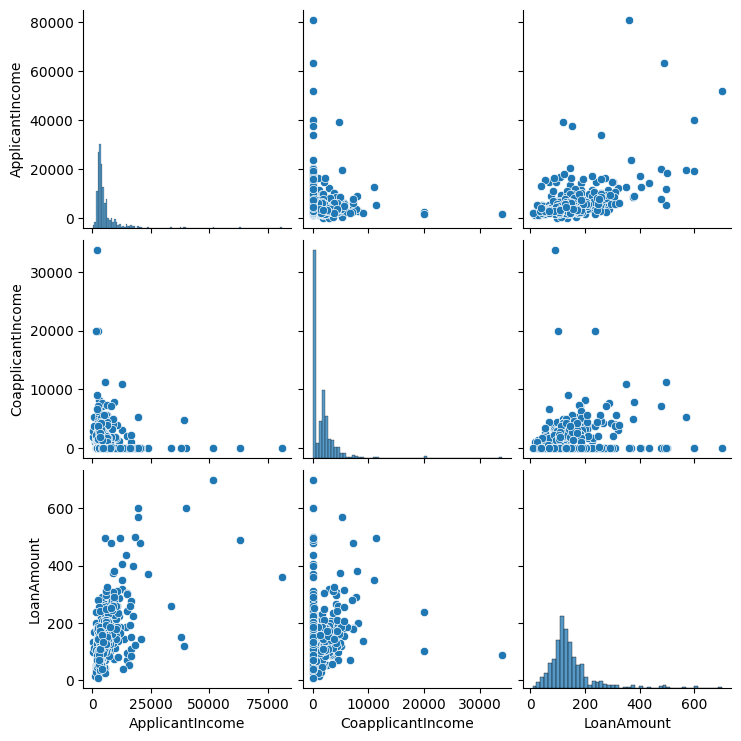

In [24]:
columns=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount']
sns.pairplot(df[columns])

<Axes: >

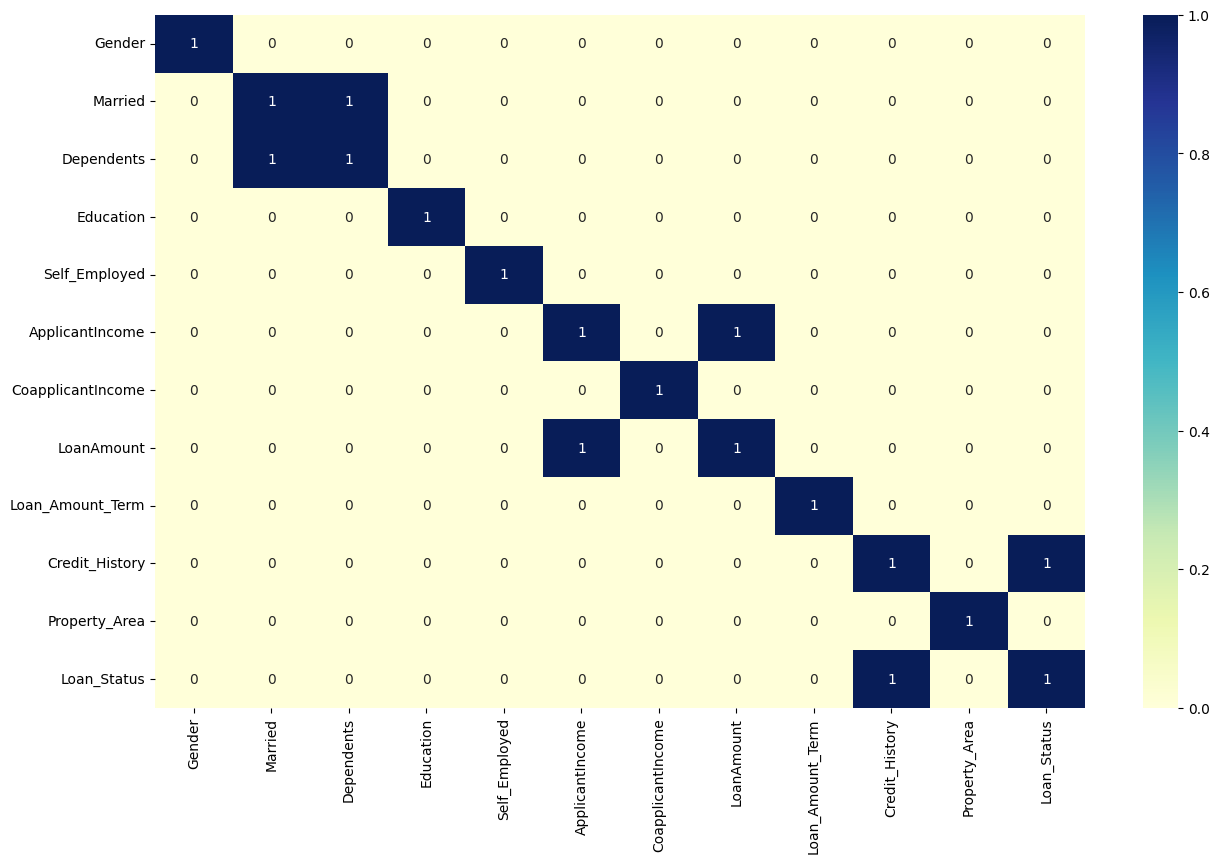

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr() >= 0.2, annot=True, cmap="YlGnBu")

**Data Preprocessing**

In [ ]:
df.drop('Loan_ID', axis = 1, inplace=True)

In [ ]:
df.info

<bound method DataFrame.info of      Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantInc

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,145.088398,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,564.000000,564.000000,564.000000,564.000000,564.000000
mean,5466.436170,1530.448440,145.088398,342.152727,0.842199
std,6271.344106,2471.721359,81.740935,63.778190,0.364878
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.750000,0.000000,101.750000,360.000000,1.000000
50%,3815.000000,1105.500000,128.500000,360.000000,1.000000
75%,5803.750000,2250.000000,162.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**Mapping objects type**

In [ ]:
cleanup_nums = {"Gender":     {"Male": 1, "Female": 2},
                "Dependents": {"0": 0, "1": 1, "2": 2, "3+": 3},
               "Married": {"Yes": 1, "No": 0},
                 "Education": {"Graduate": 1, "Not Graduate": 0 },
                "Self_Employed": {"Yes": 1, "No": 0 },
                "Property_Area":{"Semiurban":1,"Urban":2,"Rural":3},
                "Loan_Status":{"Y":1,"N":0}
                
               }

In [ ]:
df = df.replace(cleanup_nums)
df.head()

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
#Creating the X and y variables
X = df.drop('Loan_Status', axis=1).values
y = df["Loan_Status"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

**Test Input**

In [ ]:
#It should show the output 'You are eligible'
input_test = [[1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2]]

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_pred1 = nb.predict(input_test)
print("Loan Status below 👇\n")
if nb_pred1 == 1:
    print('You are eligible')
else :
    print('You are not eligible')
print("Confusion Matrix\n" ,confusion_matrix(y_test, nb_pred ))
print("Accuracy Score: ", round(accuracy_score(y_test, nb_pred),2)*100)
NBCV = (cross_val_score(nb, X_train, y_train, n_jobs=1, scoring = 'accuracy').mean())

Loan Status below 👇

You are eligible
Confusion Matrix
 [[22 17]
 [ 4 70]]
Accuracy Score:  81.0


**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
xg_pred = nb.predict(input_test)
print("Loan Status below 👇\n")
if xg_pred == 1:
    print('You are eligible')
else :
    print('You are not eligible')
print("Confusion Matrix\n" ,confusion_matrix(y_test, xgbprd ))
print("Accuracy Score: ", round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

Loan Status below 👇

You are eligible
Confusion Matrix
 [[25 14]
 [10 64]]
Accuracy Score:  79.0


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred1 = nb.predict(input_test)
print("Loan Status below 👇\n")
if rf_pred1 == 1:
    print('You are eligible')
else :
    print('You are not eligible')
print("Confusion Matrix\n" , confusion_matrix(y_test, rf_pred ))
print("Accuracy Score: ", round(accuracy_score(y_test, rf_pred),2)*100)
RFCV = (cross_val_score(rf, X_train, y_train, n_jobs=1, scoring = 'accuracy').mean())

Loan Status below 👇

You are eligible
Confusion Matrix
 [[23 16]
 [ 2 72]]
Accuracy Score:  84.0
